In [1]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(28,28, 1)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_train = np.expand_dims(X_train, axis=3)

X_test = X_test / 255.0
X_test = np.expand_dims(X_test, axis=3)

11493376/11490434 [==============================] - 18s 2us/step


In [4]:
model.fit(X_train, y_train, batch_size=128, epochs=10) 


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 189s 3ms/sample - loss: 0.1288 - accuracy: 0.9595
Epoch 2/10
60000/60000 [==============================] - 181s 3ms/sample - loss: 0.0372 - accuracy: 0.9883
Epoch 3/10
60000/60000 [==============================] - 190s 3ms/sample - loss: 0.0231 - accuracy: 0.9926
Epoch 4/10
60000/60000 [==============================] - 193s 3ms/sample - loss: 0.0169 - accuracy: 0.9943
Epoch 5/10
60000/60000 [==============================] - 189s 3ms/sample - loss: 0.0130 - accuracy: 0.9954
Epoch 6/10
60000/60000 [==============================] - 185s 3ms/sample - loss: 0.0092 - accuracy: 0.9969
Epoch 7/10
60000/60000 [==============================] - 186s 3ms/sample - loss: 0.0104 - accuracy: 0.9964
Epoch 8/10
60000/60000 [==============================] - 194s 3ms/sample - loss: 0.0057 - accuracy: 0.9981
Epoch 9/10
60000/60000 [==============================] - 213s 4ms/sample - loss: 0.0049 - accuracy: 0.9984
Epoch

In [5]:
score = model.evaluate(X_test, y_test)
print("Accuracy is: {}".format(score[1]))


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy is: 0.9872000217437744


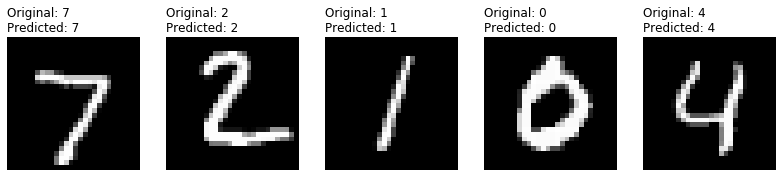

In [6]:
predictions = model.predict(X_test)

plt.figure(figsize=(28, 28)) 
for i in range(5):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    original = y_test[i]
    predicted = np.argmax(predictions[i])
    plt.title("Original: {}\nPredicted: {}".format(original, predicted), loc='left')    
    plt.axis('off') 
plt.show()

In [7]:
model.save('model.h5')